In [1]:
# Baixando
!pip install -U -q PyDrive

In [2]:
# Importando bibliotecas
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.preprocessing import LabelEncoder #Scikit Learn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
# Autenticando para entrar no drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Baixando o arquivo de metadados
downloaded = drive.CreateFile({'id': '1AUBksb9ooahhbiqi1h0DoAhyPxpylpvo'})
downloaded.GetContentFile('book_variaveis_pan_inteli_v4.csv')
print(downloaded['title'], downloaded['mimeType'])

book_variaveis_pan_inteli_v4.csv text/csv


In [5]:
# Lendo os dados do arquivo
data = pd.read_csv('book_variaveis_pan_inteli_v4.csv')

In [6]:
# Seleção da safra do ano de 2021 no mês 11
data_with_safra = data.loc[(data.anomes == 202111)]

In [7]:
# Tira as linhas duplicadas da safra
data_with_safra.drop_duplicates()

,anomes,num_cpf_hash,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,cod_rating,ind_atrito,ind_engaj,ind_novo_cli
6630818,202111,ffffd54b45ec46113523184fc07185a0d5cbfa876a07ba...,34004.35,5757.73,NaN,422.0,2.0,NaN,12.0,NaN,3.0,NaN,A,NaN,1.0,NaN
6630819,202111,ffffd47a92b3e4291c013033ae528708a19eaede50f78e...,0.00,NaN,NaN,NaN,1.0,NaN,22.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
6630820,202111,ffffc102ddd37ec29e985a4564e85a2bace79a85ebff5e...,NaN,NaN,NaN,276.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6630821,202111,ffffbd4a3d42a12e07b1202d68c33d43220c42c8a55160...,6642.56,1400.31,NaN,659.0,2.0,NaN,37.0,NaN,NaN,NaN,A,NaN,1.0,NaN
6630822,202111,ffffafb315cf6852f08137c4486cc5d52df62c75da4aeb...,11315.24,NaN,NaN,NaN,1.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532133,202111,00003a6cf049e4fe3416c1a55d1fc1aac613956ecd5d7a...,0.00,NaN,NaN,740.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7532134,202111,000038baed6e8076adec7272523211faaec7bf8b30b1e1...,30875.16,1734.02,NaN,NaN,1.0,NaN,17.0,NaN,6.0,NaN,A,NaN,1.0,NaN
7532135,202111,00003671431c71ae1a84ec138b63c7a6e465f9616af5ea...,4295.58,1443.67,NaN,329.0,1.0,NaN,5.0,NaN,3.0,NaN,H,NaN,1.0,NaN
7532136,202111,000031eae3bd9f91ad57acc059876d383658f1ba748195...,NaN,NaN,NaN,375.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [8]:
# retira as linhas sem saldo ou cod_rating
data_without_clients = data_with_safra.dropna(subset=['vlr_saldo','cod_rating'])

In [9]:
# seleciona apenas as linhas com atrito 1
data_with_friction = data_without_clients.loc[(data_without_clients['ind_atrito'] == 1)]

In [10]:
# seleciona as colunas necessárias para o modelo
cat_cols = ['anomes', 'vlr_score', 'vlr_saldo', 'num_atend', 'num_atend_atrs', 'qtd_oper', 'qtd_reclm', 'cod_rating' , 'ind_atrito' ]
data_with_cat_cols = data_with_friction[cat_cols]

In [11]:
# Substitui os valores NaN pelo valor 0
data_without_nan = data_with_cat_cols.fillna(0)

In [12]:
# criacao de uma variável que armazena os métodos do label encoder
le = LabelEncoder()
# assinalando valores númericos para uma nova coluna chamada cod_rating_numeric, assim, mapeando os dados categóricos
data_without_nan['cod_rating_numeric'] = le.fit_transform(data_without_nan['cod_rating'])
# a variável 'A' virou 0

In [13]:
# dropando colunas que auxiliaram no tratamento, mas que não vão ser usadas no dataf
data_without_nan = data_without_nan.drop(['anomes','cod_rating'], axis = 1)

In [14]:
x = data_without_nan 

In [15]:
# CONJUNTO DE DADOS NÃO ATRITADOS
# Seleciona linhas com clientes sem atrito para o novo conjunto
data_not_friction = data_without_clients.loc[(data_without_clients['ind_atrito'].isnull())]
data_not_friction

,anomes,num_cpf_hash,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,cod_rating,ind_atrito,ind_engaj,ind_novo_cli
6630818,202111,ffffd54b45ec46113523184fc07185a0d5cbfa876a07ba...,34004.35,5757.73,NaN,422.0,2.0,NaN,12.0,NaN,3.0,NaN,A,NaN,1.0,NaN
6630821,202111,ffffbd4a3d42a12e07b1202d68c33d43220c42c8a55160...,6642.56,1400.31,NaN,659.0,2.0,NaN,37.0,NaN,NaN,NaN,A,NaN,1.0,NaN
6630824,202111,ffff6070251f9e50f54190b914ed6fd735e11064d661ab...,NaN,13.31,NaN,598.0,NaN,NaN,NaN,NaN,NaN,NaN,HH,NaN,NaN,NaN
6630825,202111,ffff4ef886c28af8029c6b7d504942e6c9ef13021e9a35...,78377.15,5221.45,NaN,NaN,1.0,NaN,14.0,NaN,NaN,NaN,A,NaN,1.0,NaN
6630826,202111,ffff4bbb4074d7894174fd94c685edb3fd7fc9b7b1e3c1...,120997.23,6619.70,NaN,337.0,2.0,NaN,23.0,NaN,1.0,NaN,A,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532128,202111,00008166c6d8213d5372a4a6336322f14e7f15b982cf5d...,40482.81,2707.22,NaN,385.0,3.0,NaN,12.0,NaN,8.0,NaN,A,NaN,1.0,NaN
7532129,202111,00006b833ab2b4c8220f61fdd90c5833040030ff1b015e...,NaN,11239.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HH,NaN,NaN,NaN
7532131,202111,0000567d0d7f3813befdc85b65838d685ec6d89bb067bd...,35285.70,4017.00,NaN,392.0,1.0,NaN,16.0,NaN,4.0,NaN,H,NaN,NaN,NaN
7532134,202111,000038baed6e8076adec7272523211faaec7bf8b30b1e1...,30875.16,1734.02,NaN,NaN,1.0,NaN,17.0,NaN,6.0,NaN,A,NaN,1.0,NaN


In [16]:
# Seleciona as colunas necessárias no conjunto novo e tira os valores NaN
data_not_friction_columns = data_not_friction[cat_cols].fillna(0)

In [17]:
# Transforma o dado categórico da coluna cod_rating para numérico do novo conjunto de dados
data_not_friction_columns['cod_rating_numeric'] = le.fit_transform(data_not_friction_columns['cod_rating'])

In [18]:
# Retira as colunas que só auxiliaram na preparação dos dados  
data_not_friction_columns = data_not_friction_columns.drop(['anomes','cod_rating'], axis = 1)

In [19]:
# O conjunto y representa o conjunto não atritado
y = data_not_friction_columns.head(438)

In [20]:
# Junção de dois conjunto de dados
pre_frame = x.append(y)

In [21]:
# Agrupamento, de forma que sempre varie a ordem das linhas
safra_artificial = pre_frame.sample(frac=1)
safra_artificial

,vlr_score,vlr_saldo,num_atend,num_atend_atrs,qtd_oper,qtd_reclm,ind_atrito,cod_rating_numeric
6631544,0.0,3140.00,0.0,0.0,9.0,0.0,0.0,0
7104018,0.0,8928.46,0.0,0.0,19.0,0.0,1.0,0
6631403,0.0,18558.93,0.0,0.0,15.0,0.0,0.0,0
7473835,0.0,5639.38,1.0,0.0,23.0,1.0,1.0,0
6631002,576.0,1000.00,0.0,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
6630916,304.0,843.10,0.0,0.0,0.0,0.0,0.0,8
6631020,750.0,1262.78,0.0,0.0,9.0,0.0,0.0,0
6631254,925.0,25723.85,0.0,0.0,19.0,0.0,0.0,0
6631424,313.0,31678.53,0.0,0.0,0.0,0.0,0.0,8


In [22]:
# Pegando os nomes das colunas
names = list(x.keys())
# E pegando o valor da linhas do index 135
values = list(x.iloc[135])

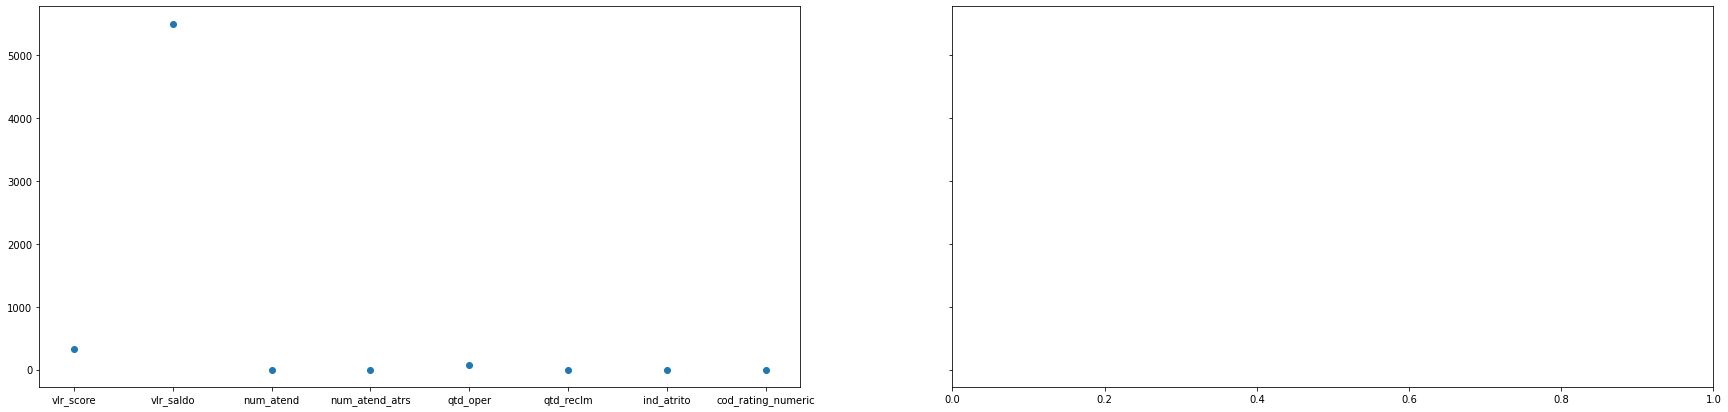

In [23]:
# Associa parametros nas duas variáveis
fig, axs = plt.subplots(1, 2, figsize=(30, 7), sharey=True)
# visualização por meio do scatter
axs[0].scatter(names, values)